# Fraud Detection

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [4]:
# data import
data = pd.read_csv(r"D:\My-LIB\Projects\ML\INSAID\Data\Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
# finding null values
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
# counting the occurences of fraud or no fraud
occurence = data['isFraud'].value_counts()
occurence

0    6354407
1       8213
Name: isFraud, dtype: int64

In [17]:
# printing the ratio of fraud cases
fraud_ratio = occurence/len(data.index)
fraud_ratio

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

### From the above results the ratio of fraud to non fraud is less, which means unbalanced data

In [18]:
# counting the occurences of isFlaggedFraud and not flagged fraud
occurence_F = data["isFlaggedFraud"].value_counts()
occurence_F

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [19]:
# ratio of the isFlaggedFraud and not flagged fraud
flagged_ratio = occurence_F/len(data.index)
flagged_ratio

0    0.999997
1    0.000003
Name: isFlaggedFraud, dtype: float64

In [21]:
data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


### By the above results it looks like the data is unbalanced for flagged fraud cases also

In [22]:
# calculating no.of frauds in each type
fraud_type = data.groupby("type")["isFraud"].count()
fraud_type

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: isFraud, dtype: int64

In [24]:
# checking the different types of steps involved in transactions
steps = data["step"].value_counts().nunique()
steps

428

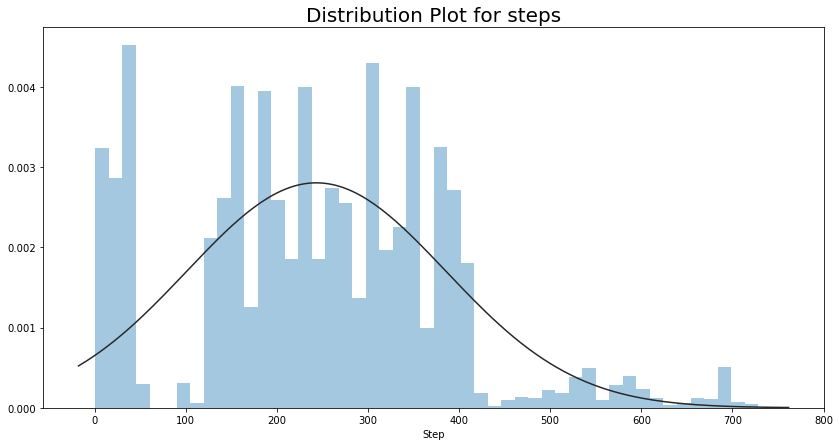

In [32]:
plt.rcParams['figure.figsize'] =(14, 7)
sns.distplot(data.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

Text(0, 0.5, 'Counts')

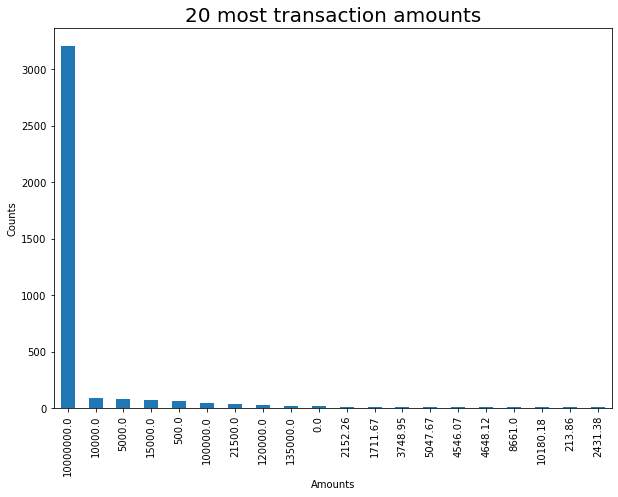

In [33]:
# checking the different values of amounts transactioned
plt.rcParams["figure.figsize"] = (10,7)
data["amount"].value_counts().head(20).plot.bar()
plt.title("20 most transaction amounts", fontsize=20)
plt.xlabel("Amounts")
plt.ylabel("Counts")

C:\Users\ratna\anaconda3\envs\kaggle\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


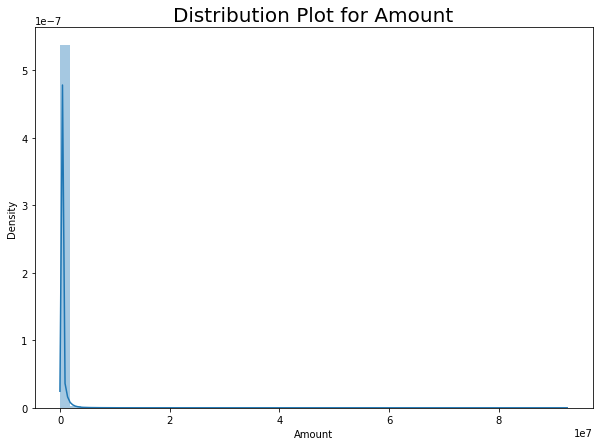

In [37]:
#Distribution Plot for Amount
ax = sns.distplot(data.amount)
ax.set_title(label = 'Distribution Plot for Amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

### Finding where the most fraudlent transactions are from

In [46]:
FraudPayment = data.loc[(data.isFraud == 1) & (data.type == 'PAYMENT')]
FraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
FraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]
FraudCashin = data.loc[(data.isFraud == 1) & (data.type == 'CASH_IN')]
Frauddebit = data.loc[(data.isFraud == 1) & (data.type == 'DEBIT')]

print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))
print ('The number of fraudulent CASH_Ins = {}'.format(len(dfFraudCashin)))
print ('The number of fraudulent Debits = {}'.format(len(dfFrauddebit)))
print ('The number of fraudulent Payments = {}'.format(len(dfFraudPayment)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116
The number of fraudulent CASH_Ins = 0
The number of fraudulent Debits = 0
The number of fraudulent Payments = 0


### From the above results most of the fraudulent transactions are from TRANSFERS and CASH_OUTS

In [47]:
# Finding out the minimum and maximum transaction from Transfer and cash out transaction modes when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [49]:
# Discovering no.of flagged fraud transactions
Flagged = data.loc[(data.isFlaggedFraud == 1) & (data.type == "TRANSFER")]
print("The no.of flagged fraud transactions by TRANSFER type are: ",len(Flagged))

Flagged_ = data.loc[(data.isFlaggedFraud == 1) & (data.type == "CASH_OUT")]
print("The no.of flagged fraud transactions by CASHOUT type are: ", len(dfFraudCashout))

The no.of flagged fraud transactions by TRANSFER type are:  16
The no.of flagged fraud transactions by CASHOUT type are:  4116


### Creating a dataframe where only TRANSFER type of fraudlent transactions are mentioned

In [51]:
dataTransfer = data.loc[data["type"] == "TRANSFER"]
dataTransfer = pd.DataFrame(dataTransfer)
dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


In [52]:
# checking the type column to be TRANSFER
dataTransfer["type"].unique()

array(['TRANSFER'], dtype=object)

### The below table shows flagged frauds with minimum original balance

In [57]:
# Frauds have same old and new balance
# sorted by old original balance to new original balnce for flagged frauds
dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1


In [58]:
# Frauds having same old and new balance
# Sorted by old orignal balance to check original old balance for flagged frauds
dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1
6281484,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.0,0.0,1,1
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1


In [60]:
# Finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = data.loc[data.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud in Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud in Transfer mode :', dataFlagged.oldbalanceOrg.max())

Minimum Balance of oldBalanceOrig for FlaggedFraud in Transfer mode : 353874.22
Maximum Balance of oldbalanceOrig for FlaggedFraud in Transfer mode : 19585040.37


In [100]:
# since fraud has occured for TRANSFER and CASH_OUT types
X = data.loc[(data.type == "TRANSFER") | (data.type == "CASH_OUT")]
X.shape

(2770409, 11)

In [101]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [102]:
X["type"].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [103]:
# Removing unwanted columns
X = X.drop(['nameDest', 'nameOrig'], axis=1)
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,0


## Preprocessing and Feature Engineering

In [104]:
# Adding new features to the dataset
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.newbalanceDest + X.amount - X.oldbalanceDest
X.shape

(2770409, 11)

In [105]:
# OneHotEncoding for categorical columns
X["type"].replace('TRANSFER', 0, inplace=True)
X["type"].replace('CASH_OUT', 1, inplace=True)

In [106]:
X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,-21001.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,213808.94,275564.38
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,0,214605.30,192885.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,0,300850.89,3024591.78
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,83569.30,-175970.13
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0,55011.88,50807.08
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,0,5346.89,5806140.80
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,0,2849.77,-2480.70
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0,0.00,70477.09


In [107]:
# Checking the number of fraud cases in the new dataset(X)
X["isFraud"].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

### Here we're taking isFraud as the target variable

In [108]:
y = X["isFraud"]

X = X.drop(['isFraud'], axis=1) # Training set
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (2770409, 10)
Shape of y:  (2770409,)


In [109]:
X.head() # training set

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0,0.00,181.00
3,1,1,181.00,181.0,0.0,21182.0,0.00,0,0.00,-21001.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,275564.38
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,192885.30
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,3024591.78


In [110]:
y.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

### Applying SMOTE for balanced datasets

In [117]:
from imblearn.over_sampling import SMOTE
method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X,y)
print("Shape of X: ", X_resampled.shape)
print("Shape of Y:", y_resampled.shape)

Shape of X:  (5524392, 10)
Shape of Y: (5524392,)


In [118]:
# Spliting the datasets into train and tests
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

In [120]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

print("\nShape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (4419513, 10)
Shape of y_train:  (4419513,)

Shape of x_test:  (1104879, 10)
Shape of y_test:  (1104879,)


In [122]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Building XGBoost model for prediction

In [123]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state = 42, n_jobs =1, n_estimators=20, max_depth=2)

In [124]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [127]:
x_preds = model.predict(x_train)
x_preds

array([1.0042577 , 1.0042577 , 0.0059003 , ..., 0.9861372 , 0.9861372 ,
       0.00952817], dtype=float32)

In [139]:
from sklearn.metrics import average_precision_score
avgps = average_precision_score(y_train, x_preds)
print("The area under the precision recall curve score for x_train is: ", avgps)

The area under the precision recall curve score for x_train is:  0.999171724897366


In [142]:
y_preds = model.predict(x_test)
auprc = average_precision_score(y_test, y_preds)
print("The Area under Precision Recall Curve Score For y_train is", auprc)

The Area under Precision Recall Curve Score For y_train is 0.7793884261843753


In [143]:
X.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud',
       'errorBalanceOrig', 'errorBalanceDest'],
      dtype='object')

## Feature Importance

In [155]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

In [158]:
importance_df.head(10)

,feature,importance
8,errorBalanceOrig,0.790254
4,newbalanceOrig,0.129059
6,newbalanceDest,0.048466
2,amount,0.020222
3,oldbalanceOrg,0.009734
9,errorBalanceDest,0.001901
0,step,0.000364
1,type,0.000000
5,oldbalanceDest,0.000000
7,isFlaggedFraud,0.000000


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

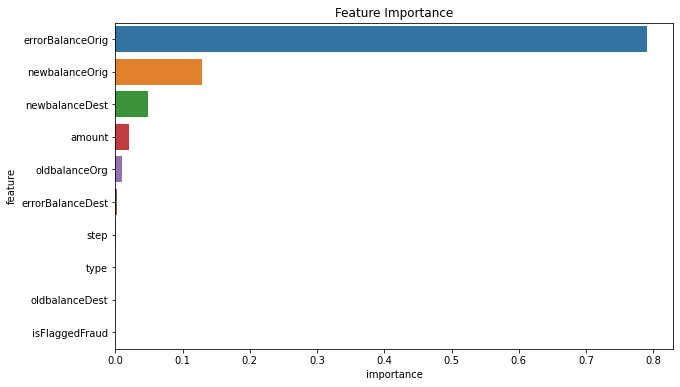

In [159]:
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
sns.barplot(data= importance_df.head(10),x= 'importance', y='feature')

## From observing the feature importance table we can conclude the most important features is errorBalanceOrig

In [160]:
# comparing actual outcomes vs predicted outcomes
from sklearn.metrics import accuracy_score
y_pred = (y_preds > 0.5)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5061124340312378


## Implementing logistic regression also

In [162]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [163]:
# obtain model predictions
predictions = model.predict(x_test)

In [164]:
# printing classification report and confusion matrix
from sklearn.metrics import r2_score, confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

print("Classificaiton Report:\n", classification_report(y_test, predictions))
confusion_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_matrix)

Classificaiton Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95    551906
           1       0.95      0.95      0.95    552973

    accuracy                           0.95   1104879
   macro avg       0.95      0.95      0.95   1104879
weighted avg       0.95      0.95      0.95   1104879

Confusion Matrix:
 [[524044  27862]
 [ 29675 523298]]


In [165]:
accuracy_logistic = accuracy_score(y_test, predictions)
accuracy_logistic

0.9479246143695373

## Comparing the accuracy score of the above two models (XGBoost & Logistic Regression) we can conclude that accuracy of Logistic Model is highest